In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [176]:
df = pd.read_csv('StudentPerformanceFactors.csv')
data= df.copy()

In [164]:
data['Teacher_Quality'] = data['Teacher_Quality'].fillna('Medium')
data['Parental_Education_Level']=data['Parental_Education_Level'].fillna('Unknown')
data['Distance_from_Home'] = data['Distance_from_Home'].fillna('Near')

In [165]:
Home_mapping ={
  'Near':0,
  'Moderate':1,
  'Far':2
}
data['encoded_Distance_from_Home'] = data['Distance_from_Home'].map(Home_mapping)

In [166]:
parental_education_mapping = {
  'Unknown':0,
  'High School':1,
  'College':2,
  'Postgraduate':3
}
data['encoded_Parental_Education_Level'] = data['Parental_Education_Level'].map(parental_education_mapping)

In [167]:
level_mapping = {"Low": 1, "Medium": 2, "High": 3}
columns_to_encode = [
    "Access_to_Resources",
    "Parental_Involvement",
    "Motivation_Level",
    "Teacher_Quality",
    "Family_Income",
]
for col in columns_to_encode:
    data[f"encoded_{col}"] = data[col].map(level_mapping)

In [168]:
binary_mapping={
  'No':0,
  'Yes':1
}
binary_columns = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']
for col in binary_columns:
  data[f'encoded_{col}'] = data[col].map(binary_mapping)

In [169]:
school_maping = {
  'Public':0,
  'Private':1
}
data['encoded_School_Type'] = data['School_Type'].map(school_maping)

In [170]:
peer_influence_mapping = {
    'Negative': 1,
    'Neutral': 2, 
    'Positive': 3
}
data['encoded_Peer_Influence'] = data['Peer_Influence'].map(peer_influence_mapping)

In [171]:
X = data[
    [
        "Hours_Studied",
        "Attendance",
        "Sleep_Hours",
        "Previous_Scores",
        "Tutoring_Sessions",
        "Physical_Activity",
        'encoded_Access_to_Resources',
        'encoded_Parental_Involvement',
        'encoded_Motivation_Level',
        'encoded_Extracurricular_Activities',
        'encoded_Internet_Access',
        'encoded_Learning_Disabilities',
        'encoded_Peer_Influence',
        'encoded_Teacher_Quality',
        'encoded_School_Type',
        'encoded_Parental_Education_Level',
        'encoded_Family_Income',
        'encoded_Distance_from_Home'
    ]
]
y = data["Exam_Score"]

model = LinearRegression()
model.fit(X, y)
predicted_score = model.predict(X)


In [172]:
# Evaluate
mae = mean_absolute_error(y, predicted_score)
mse = mean_squared_error(y, predicted_score)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted_score)

print("Mean Absolute ERROR (MAE): ", round(mae, 2))
print("Mean Squared ERROR (MSE): ", round(mse, 2))
print("Root Mean Squared ERROR (RMSE): ", round(rmse, 2))
print("r^2 Score (Model accurecy): ", round(r2, 4))

Mean Absolute ERROR (MAE):  0.48
Mean Squared ERROR (MSE):  4.13
Root Mean Squared ERROR (RMSE):  2.03
r^2 Score (Model accurecy):  0.7268


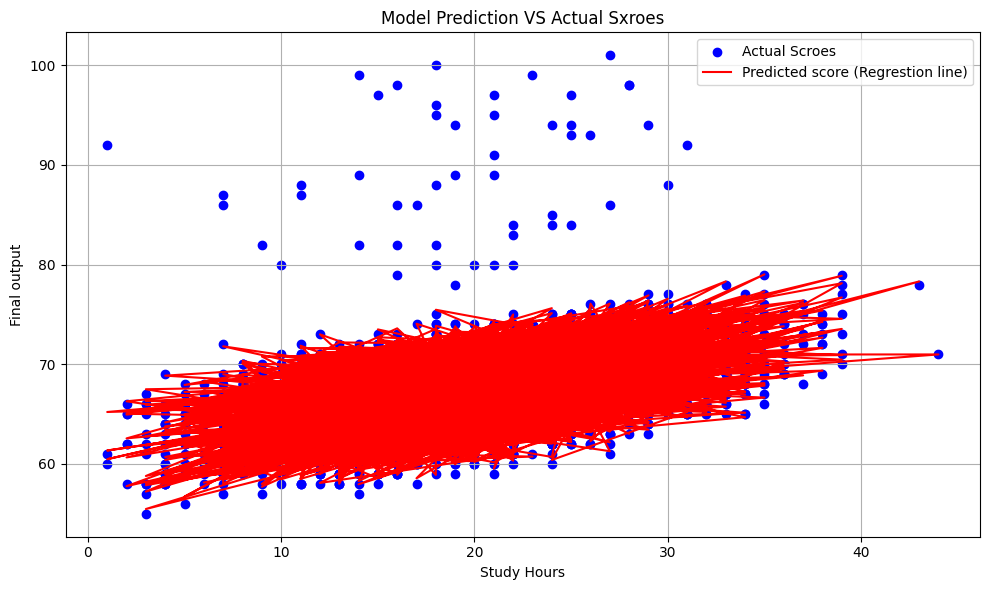

In [173]:
plt.figure(figsize=[10,6])
plt.scatter(data['Hours_Studied'],y,color='blue',label='Actual Scroes')
plt.plot(data['Hours_Studied'], predicted_score, color='red', label='Predicted score (Regrestion line)')
plt.title('Model Prediction VS Actual Sxroes')
plt.xlabel("Study Hours")
plt.ylabel('Final output')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [178]:
user_input = []

for rows in X:
  value = int(input(f"Enter value for {rows}: "))
  user_input.append(value)

test_student = np.array(user_input).reshape(1, -1)
predicted_exam_score = model.predict(test_student)
print(f"\nPredicted Exam Score: {predicted_exam_score[0]:.2f}")


Predicted Exam Score: 47.22


d:\Scikit-Learn\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
